In [0]:
import tensorflow as tf

Loading MNIST dataset , converting int to float by normalizing the data

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


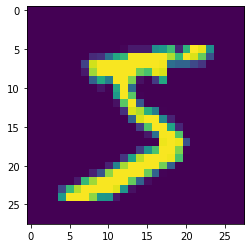

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

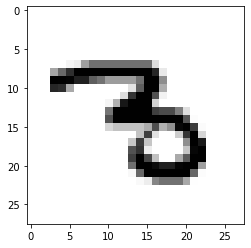

In [0]:
$Normalized image 
plt.imshow(x_train[30],cmap=plt.cm.binary)

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

##logits
The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.logits sometimes refer to the element-wise inverse of the sigmoid function.

In [0]:
predictions = model(x_train[:1]).numpy()
#printing logits
predictions

array([[-0.31144428,  0.6597873 , -0.6283324 , -0.5924029 ,  1.062861  ,
        -0.2446262 ,  0.5227959 , -0.326687  ,  0.03971927, -0.57676876]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [0]:
tf.nn.softmax(predictions).numpy()

array([[0.06401347, 0.16907209, 0.0466282 , 0.04833399, 0.25300238,
        0.06843687, 0.1474271 , 0.06304514, 0.0909452 , 0.04909559]],
      dtype=float32)

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [0]:
loss_fn(y_train[:1], predictions).numpy()

2.6818435

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [0]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9757


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [0]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0711 - accuracy: 0.9756


[0.07112359255552292, 0.975600004196167]

The image classifier is now trained to ~98% accuracy on this dataset.